<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Pazarlama_Kampanya_Analizi_ve_ROI_Tahmini_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Pazarlama Kampanya Analizi ve ROI Tahmini
Amaç: Farklı pazarlama kampanyalarının uygulamaya etkisini analiz edip, yatırım geri dönüş oranlarını tahmin etmek.
•	Veri: Kampanya türü, maliyeti, kullanıcı kazanımı, kullanıcı başına gelir.
•	Yöntem:
o	ROI = (Gelir - Maliyet) / Maliyet
o	LTV-CPA karşılaştırması
•	Araçlar: Pandas, Matplotlib, Google Sheets
📌 Ek: LTV tahminiyle entegre et → pazarlama tahmin sürecine katkı sağlar.   bunu berabe r yapabilirmiyiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


✅ 2. Örnek Veri Seti Oluştur (Simülasyon)


In [2]:
np.random.seed(42)

data = {
    "campaign": ["Facebook Ads", "Instagram Ads", "Google Ads", "YouTube Ads", "Email Marketing"],
    "cost": [5000, 4000, 6000, 5500, 3000],  # Harcanan bütçe ($)
    "acquired_users": [250, 200, 320, 280, 150],  # Kazanılan kullanıcı
    "revenue": [8000, 6500, 10000, 9500, 4000]  # Toplam gelir
}

df = pd.DataFrame(data)
df


,campaign,cost,acquired_users,revenue
0,Facebook Ads,5000,250,8000
1,Instagram Ads,4000,200,6500
2,Google Ads,6000,320,10000
3,YouTube Ads,5500,280,9500
4,Email Marketing,3000,150,4000


✅ 3. ROI Hesapla


In [3]:
df["roi"] = (df["revenue"] - df["cost"]) / df["cost"]
df["roi_percent"] = df["roi"] * 100
df[["campaign", "roi_percent"]]


,campaign,roi_percent
0,Facebook Ads,60.000000
1,Instagram Ads,62.500000
2,Google Ads,66.666667
3,YouTube Ads,72.727273
4,Email Marketing,33.333333


✅ 4. LTV ve CPA Hesapla


In [4]:
df["ltv"] = df["revenue"] / df["acquired_users"]  # Lifetime Value
df["cpa"] = df["cost"] / df["acquired_users"]     # Cost per Acquisition
df[["campaign", "ltv", "cpa"]]


,campaign,ltv,cpa
0,Facebook Ads,32.000000,20.000000
1,Instagram Ads,32.500000,20.000000
2,Google Ads,31.250000,18.750000
3,YouTube Ads,33.928571,19.642857
4,Email Marketing,26.666667,20.000000


Yorum:
Eğer LTV > CPA ise kampanya kârlı sayılır. Aksi durumda zarar etme riski vardır.

✅ 5. ROI Görselleştirme



<ipython-input-5-9fbe009219a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="roi_percent", y="campaign", data=df, palette="viridis")


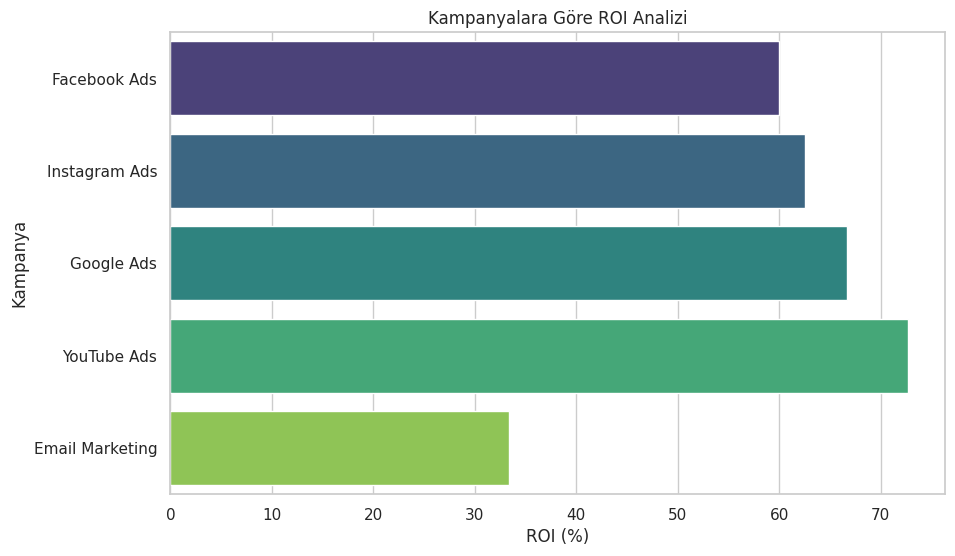

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x="roi_percent", y="campaign", data=df, palette="viridis")
plt.xlabel("ROI (%)")
plt.ylabel("Kampanya")
plt.title("Kampanyalara Göre ROI Analizi")
plt.show()


✅ 6. LTV vs CPA Görselleştirmesi



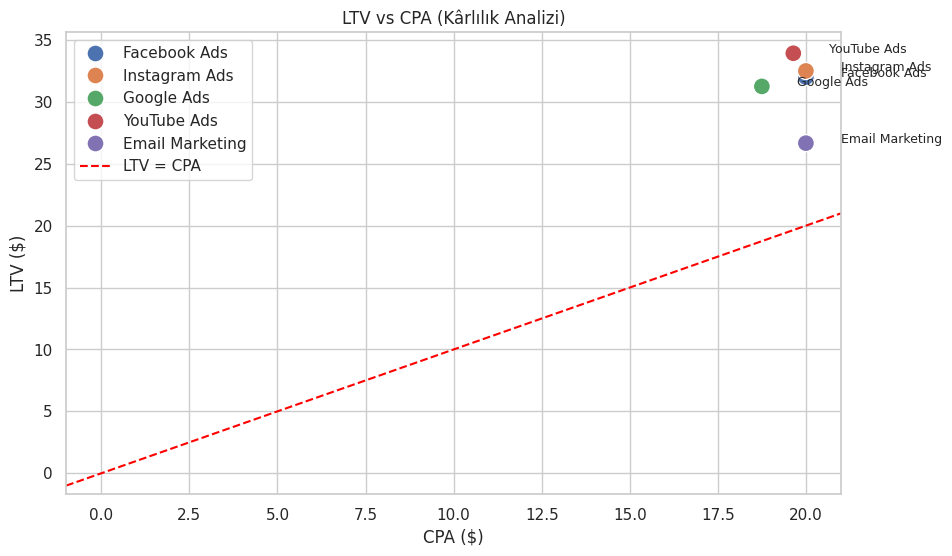

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="cpa", y="ltv", hue="campaign", s=150)

for i in range(len(df)):
    plt.text(df["cpa"][i]+1, df["ltv"][i], df["campaign"][i], fontsize=9)

plt.axline((0, 0), slope=1, color="red", linestyle="--", label="LTV = CPA")
plt.xlabel("CPA ($)")
plt.ylabel("LTV ($)")
plt.title("LTV vs CPA (Kârlılık Analizi)")
plt.legend()
plt.show()


🎯 Projenin Sonucu:
ROI en yüksek kampanyaları belirleyebiliriz.

LTV > CPA olanlar sürdürülebilir pazarlama stratejilerini gösterir.

Hangi kanallar daha verimli, hangi kanallar yatırım gerektiriyor, görebiliriz.